# Movie Reviews using different Classifiers :

In [3]:
import numpy as np 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

In [18]:
# Checking for null values in train and test datasets
print("Train Dataset - Null Values:")
print(train_csv.isnull().sum())

print("\nTest Dataset - Null Values:")
print(test_csv.isnull().sum())


Train Dataset - Null Values:
0    0
1    0
dtype: int64

Test Dataset - Null Values:
0    0
1    0
dtype: int64


In [19]:
# Descriptive statistics
print("Descriptive Statistics:")
print(train_csv.describe())

# Class distribution
print("\nClass Distribution:")
print(train_csv['1'].value_counts())

# Review length distribution
train_csv['Review_Length'] = train_csv['0'].apply(lambda x: len(x.split()))
print("\nReview Length Distribution:")
print(train_csv['Review_Length'].describe())


Descriptive Statistics:
                 1
count  25000.00000
mean       0.50000
std        0.50001
min        0.00000
25%        0.00000
50%        0.50000
75%        1.00000
max        1.00000

Class Distribution:
0    12500
1    12500
Name: 1, dtype: int64

Review Length Distribution:
count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: Review_Length, dtype: float64


## Using tf-idf :

In [4]:
test_csv = pd.read_csv('test_data (1).csv')
train_csv = pd.read_csv('train_data (1).csv')

train_X = train_csv['0']   # '0' corresponds to Texts/Reviews
train_y = train_csv['1']   # '1' corresponds to Label (1 - positive and 0 - negative)
test_X = test_csv['0']
test_y = test_csv['1']

In [5]:
tf_vectorizer = CountVectorizer()
X_train_tf = tf_vectorizer.fit_transform(train_X)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)


n_samples: 25000, n_features: 74849


In [6]:
print(X_train_tf.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
X_test_tf = tf_vectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)


n_samples: 25000, n_features: 74849


### Using naive bayse classifier :

##### For traing the model :

In [8]:

naive_bayes_classifier = MultinomialNB()

naive_bayes_classifier.fit(X_train_tf, train_y)


MultinomialNB()

#### While testing the model :

In [9]:
y_pred = naive_bayes_classifier.predict(X_test_tf)

score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

accuracy:   0.814
              precision    recall  f1-score   support

    Positive       0.78      0.88      0.82     12500
    Negative       0.86      0.75      0.80     12500

    accuracy                           0.81     25000
   macro avg       0.82      0.81      0.81     25000
weighted avg       0.82      0.81      0.81     25000

confusion matrix:
[[10984  1516]
 [ 3145  9355]]


### Using decision tree classifier :


In [10]:
count_vectorizer = CountVectorizer()
X_train_counts = count_vectorizer.fit_transform(train_X)
X_test_counts = count_vectorizer.transform(test_X)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_counts, train_y)
y_pred = decision_tree_classifier.predict(X_test_counts)

accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy: %0.3f" % accuracy)

print(metrics.classification_report(test_y, y_pred, target_names=['Negative', 'Positive']))

print("Confusion Matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

Accuracy: 0.715
              precision    recall  f1-score   support

    Negative       0.72      0.72      0.72     12500
    Positive       0.72      0.72      0.72     12500

    accuracy                           0.72     25000
   macro avg       0.72      0.72      0.72     25000
weighted avg       0.72      0.72      0.72     25000

Confusion Matrix:
[[8942 3558]
 [3559 8941]]


### Using  Random forest classifier  :


In [11]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_counts, train_y)
y_pred = random_forest_classifier.predict(X_test_counts)

accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy: %0.3f" % accuracy)

print(metrics.classification_report(test_y, y_pred, target_names=['Negative', 'Positive']))

print("Confusion Matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

Accuracy: 0.846
              precision    recall  f1-score   support

    Negative       0.84      0.85      0.85     12500
    Positive       0.85      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000

Confusion Matrix:
[[10633  1867]
 [ 1972 10528]]


### Using  adaboost classifier :
###### Taking base estimator as Naive Bayes

In [12]:
base_estimator = MultinomialNB()

# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator)

# Train the classifier
adaboost_classifier.fit(X_train_counts, train_y)

# Make predictions
y_pred = adaboost_classifier.predict(X_test_counts)

# Evaluate the model
accuracy = metrics.accuracy_score(test_y, y_pred)
print("Accuracy: %0.3f" % accuracy)

print(metrics.classification_report(test_y, y_pred, target_names=['Negative', 'Positive']))

print("Confusion Matrix:")
print(metrics.confusion_matrix(test_y, y_pred))

C:\Users\msate\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.511
              precision    recall  f1-score   support

    Negative       0.51      0.97      0.66     12500
    Positive       0.63      0.05      0.10     12500

    accuracy                           0.51     25000
   macro avg       0.57      0.51      0.38     25000
weighted avg       0.57      0.51      0.38     25000

Confusion Matrix:
[[12096   404]
 [11824   676]]


## K-fold :
##### Used to cross-validation to evaluate model performance more reliably.

In [13]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Naive Bayes classifier
scores = cross_val_score(naive_bayes_classifier, X_train_counts, train_y, cv=5)
print("Cross-Validation Scores for Naive Bayes:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Scores for Naive Bayes: [0.843  0.8414 0.8426 0.8586 0.8562]
Mean Accuracy: 0.8483600000000001


# Real time Prediction :

In [14]:
def predict_sentiment(review, model, vectorizer):
    review_counts = vectorizer.transform([review])
    prediction = model.predict(review_counts)
    return "Positive" if prediction == 1 else "Negative"

# Example usage
new_review = "I absolutely loved this movie! The acting was superb and the storyline was captivating."
print("Predicted Sentiment:", predict_sentiment(new_review, naive_bayes_classifier, count_vectorizer))


Predicted Sentiment: Positive


# Visualizations: 

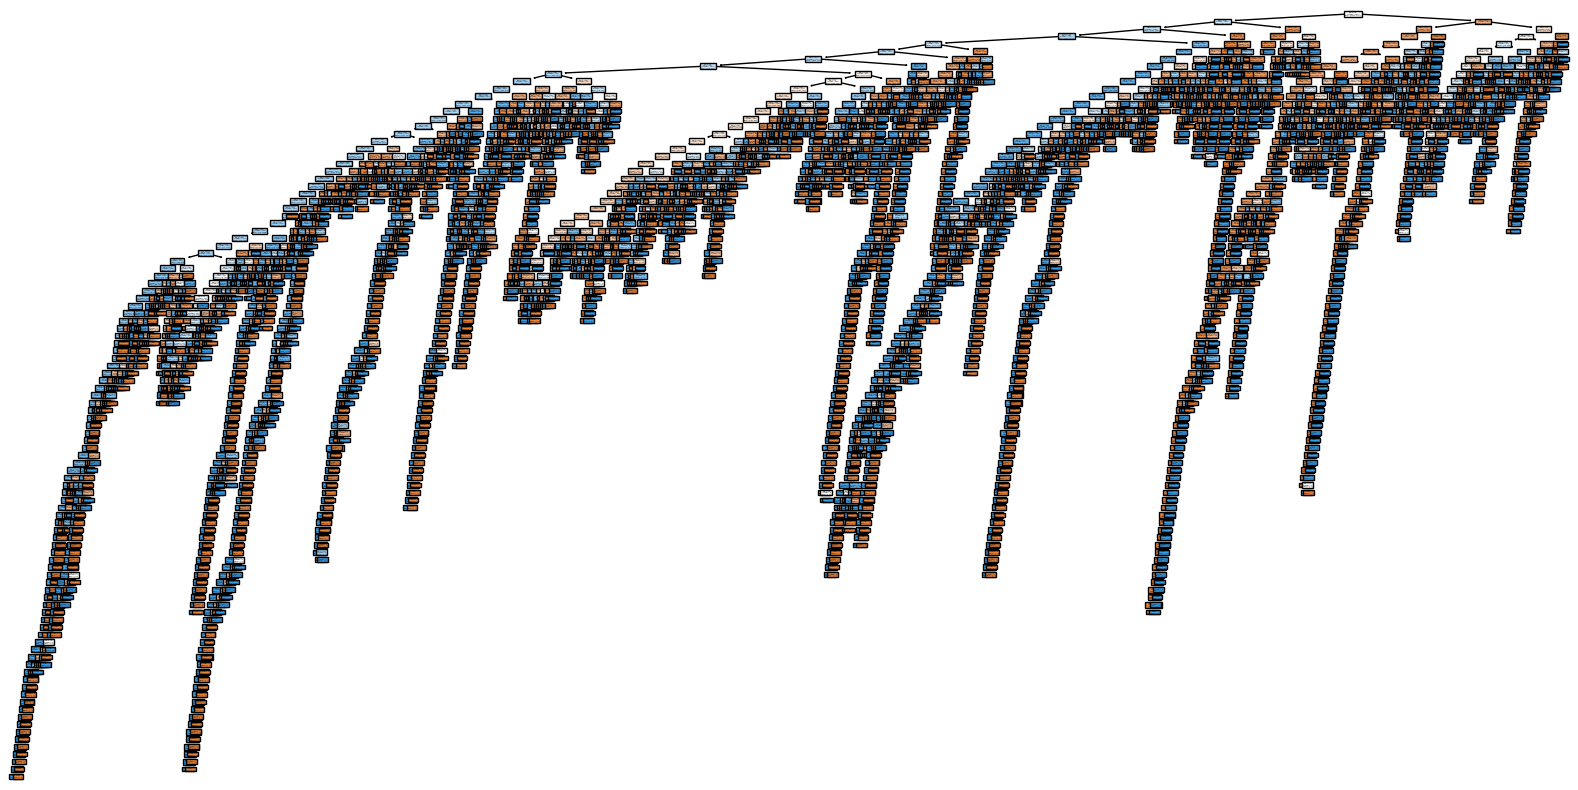

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(decision_tree_classifier, filled=True, feature_names=count_vectorizer.get_feature_names_out())
plt.show()


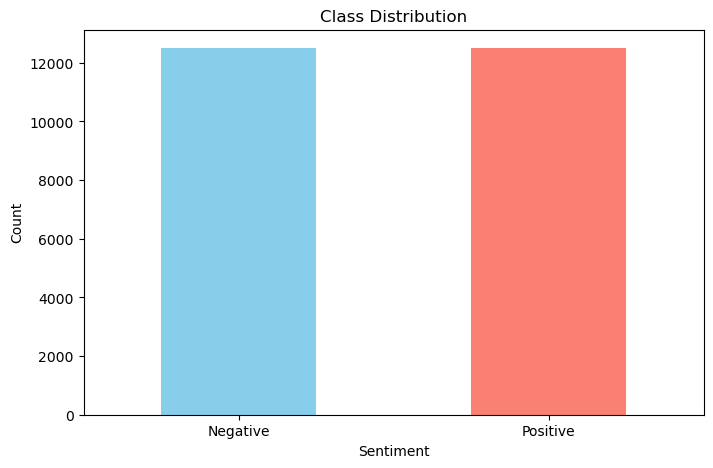

In [16]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 5))
train_y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()


In [20]:
pip install wordcloud

                                              0.0/300.2 kB ? eta -:--:--
     ----------------------                 174.1/300.2 kB 5.3 MB/s eta 0:00:01
     -------------------------------------- 300.2/300.2 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


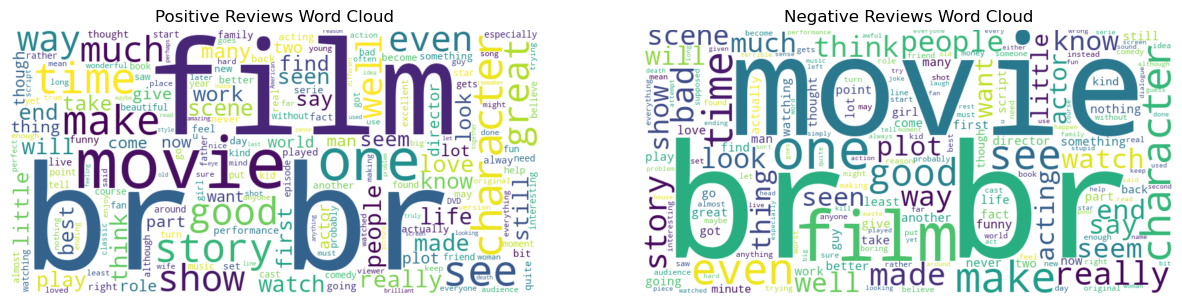

In [21]:
from wordcloud import WordCloud

# Join all positive and negative reviews
positive_reviews = ' '.join(train_X[train_y == 1])
negative_reviews = ' '.join(train_X[train_y == 0])

# Generate word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

# Plot word clouds
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


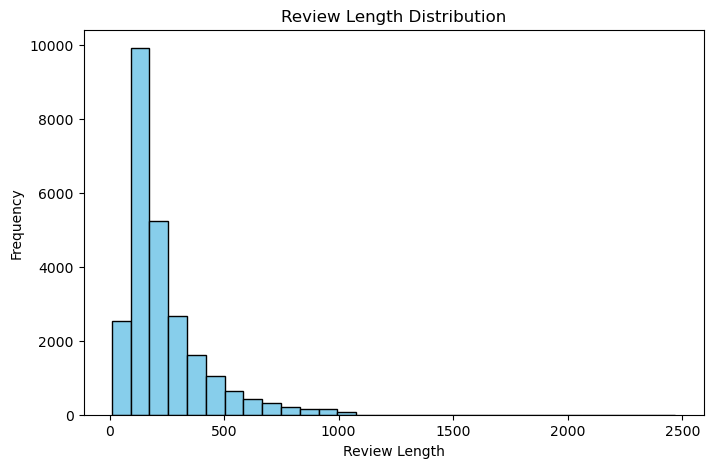

In [22]:
# Calculate review lengths
review_lengths = train_X.apply(lambda x: len(x.split()))

# Plot review length distribution
plt.figure(figsize=(8, 5))
plt.hist(review_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


In [23]:
from collections import Counter

# Tokenize and count words in positive and negative reviews
positive_words = ' '.join(train_X[train_y == 1]).split()
negative_words = ' '.join(train_X[train_y == 0]).split()

# Calculate word frequencies
positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

# Print most common words
print("Top 10 Most Common Words in Positive Reviews:", positive_word_freq.most_common(10))
print("Top 10 Most Common Words in Negative Reviews:", negative_word_freq.most_common(10))


Top 10 Most Common Words in Positive Reviews: [('the', 148414), ('and', 84276), ('a', 79428), ('of', 75341), ('to', 65209), ('is', 55358), ('in', 45796), ('that', 31943), ('I', 30928), ('it', 26991)]
Top 10 Most Common Words in Negative Reviews: [('the', 138618), ('a', 75668), ('and', 68388), ('of', 67631), ('to', 67359), ('is', 47871), ('in', 39784), ('I', 35045), ('that', 32617), ('this', 31177)]
